In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
%matplotlib inline
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('vehicle.csv')
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [3]:
df.tail()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,car
845,85,36.0,66.0,123.0,55.0,5,120.0,56.0,17.0,128,140.0,212.0,131.0,73.0,1.0,18.0,186.0,190,van


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


    we can say that there are attributes with normal distribution and right skewed distribution
    Example: compactness, cirularity, hollows_ratio etc (nomrmally distributed)
             radius_ratio, pr.axis_aspect_ratio etc (rightly skewed)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [6]:
#Checking for missing values.

df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

Lots of columns have missing values.

In [7]:
# replacing missing values '?' into null variables

df = df.replace('', np.nan)

In [8]:
# replacing those missing values with median
for k in df.columns[:17]:
    median_value = df[k].median()
    df[k] = df[k].fillna(median_value)

As some attributes are right skewed, we can use median.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001778C7C8EC8>,
      dtype=object)

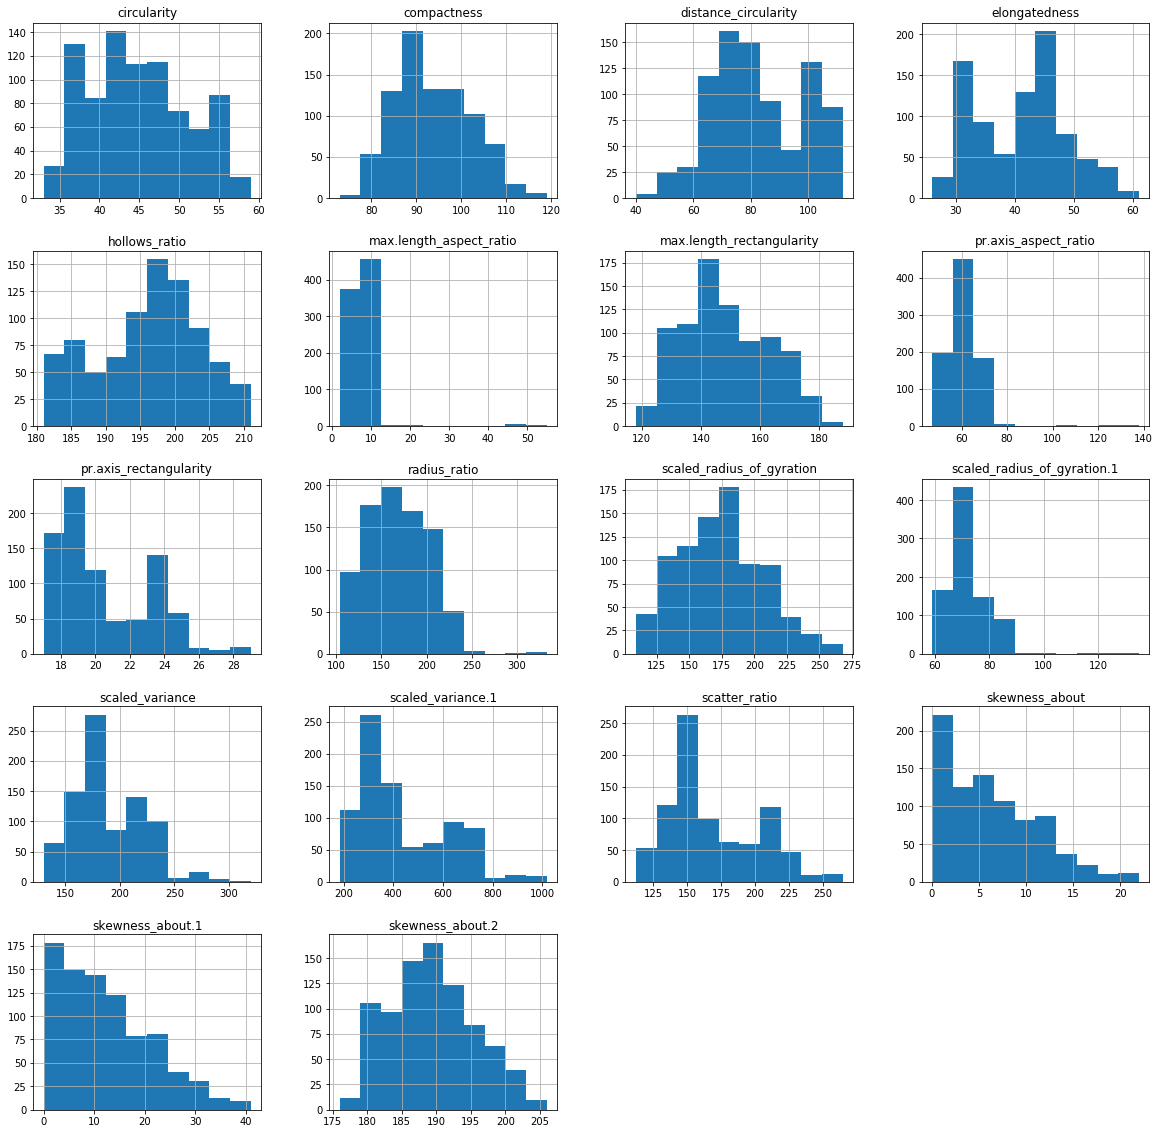

In [9]:
# Histogram

df.hist(figsize=(20, 20))

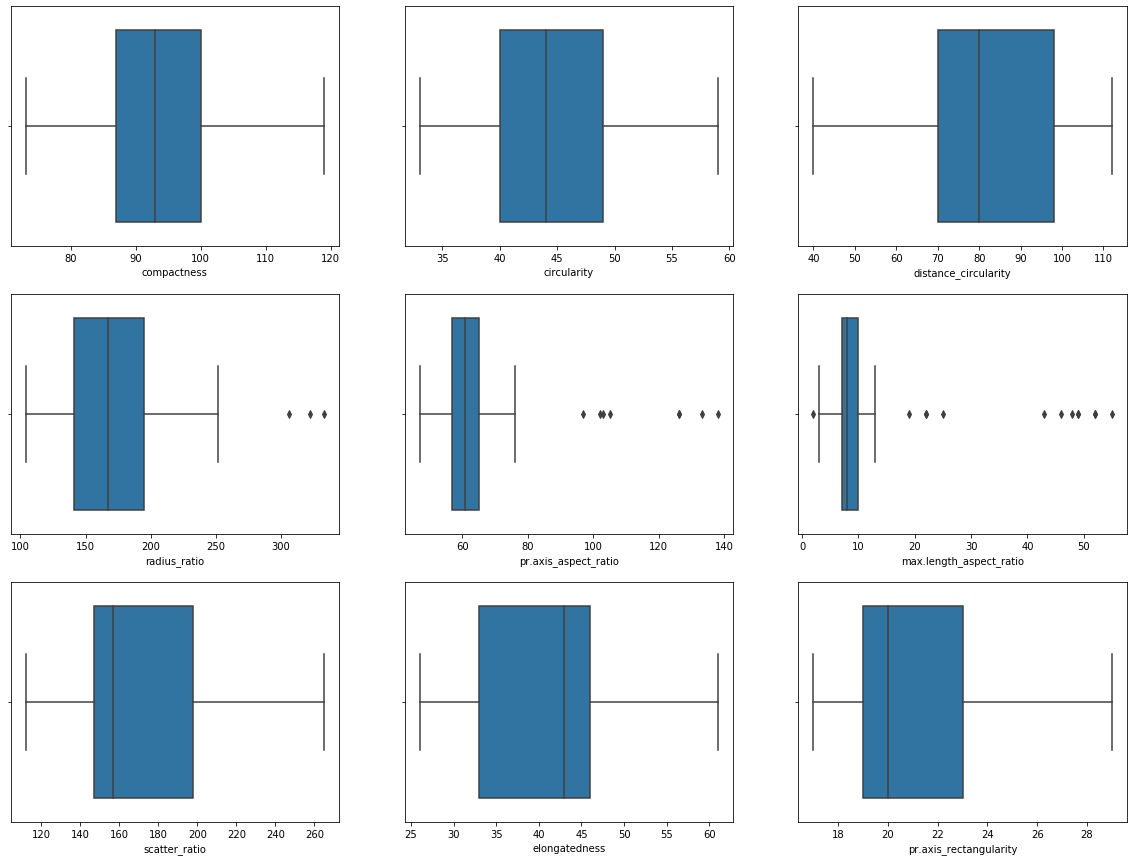

In [10]:
# Data Visualization using boxplot

f,axes=plt.subplots(3,3,figsize=(20,15))
sns.boxplot(df['compactness'],ax=axes[0,0])
sns.boxplot(df['circularity'],ax=axes[0,1])
sns.boxplot(df['distance_circularity'],ax=axes[0,2])
sns.boxplot(df['radius_ratio'],ax=axes[1,0])
sns.boxplot(df['pr.axis_aspect_ratio'],ax=axes[1,1])
sns.boxplot(df['max.length_aspect_ratio'],ax=axes[1,2])
sns.boxplot(df['scatter_ratio'],ax=axes[2,0])
sns.boxplot(df['elongatedness'],ax=axes[2,1])
sns.boxplot(df['pr.axis_rectangularity'],ax=axes[2,2])
plt.show()

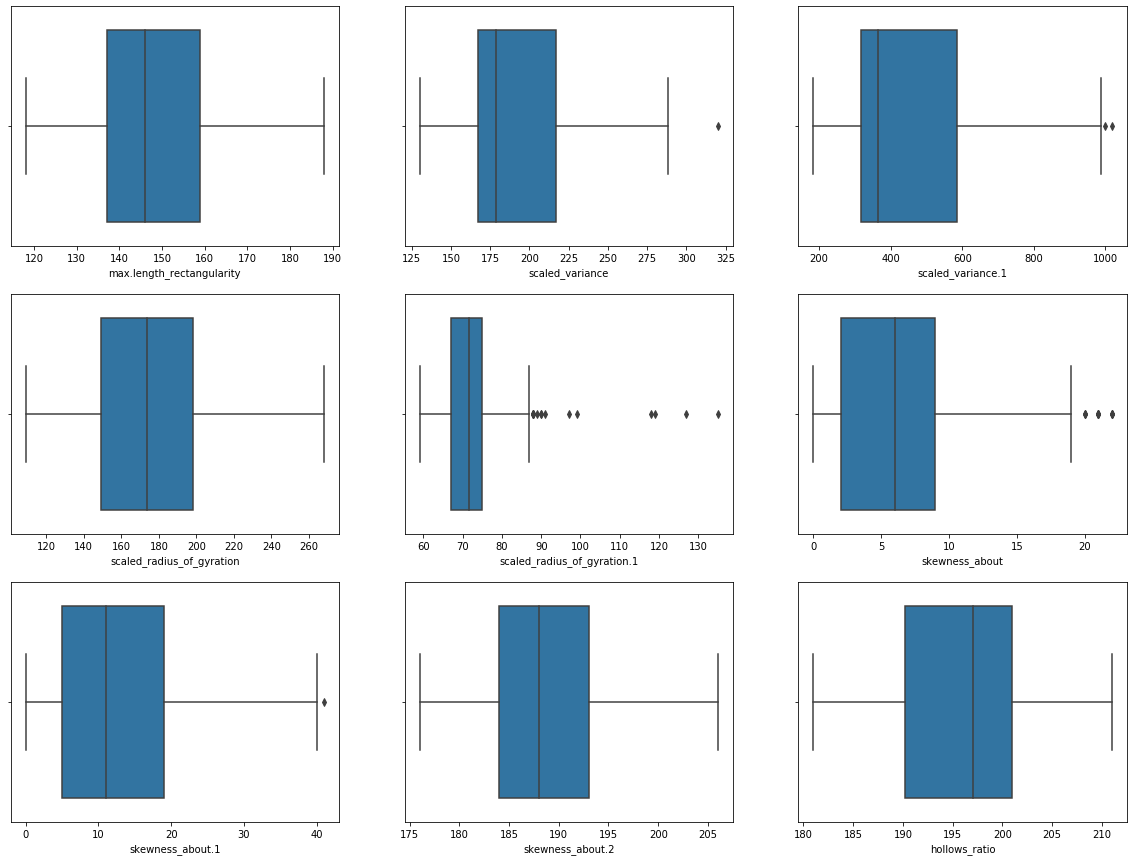

In [11]:
# The remaining attributes

f,axes=plt.subplots(3,3,figsize=(20,15))
sns.boxplot(df['max.length_rectangularity'],ax=axes[0,0])
sns.boxplot(df['scaled_variance'],ax=axes[0,1])
sns.boxplot(df['scaled_variance.1'],ax=axes[0,2])
sns.boxplot(df['scaled_radius_of_gyration'],ax=axes[1,0])
sns.boxplot(df['scaled_radius_of_gyration.1'],ax=axes[1,1])
sns.boxplot(df['skewness_about'],ax=axes[1,2])
sns.boxplot(df['skewness_about.1'],ax=axes[2,0])
sns.boxplot(df['skewness_about.2'],ax=axes[2,1])
sns.boxplot(df['hollows_ratio'],ax=axes[2,2])
plt.show()

    Lots of outliers in attributes
   

### Handling the Outliers.

In [12]:
# Replacing the outliers with median

for i in range(len(df['radius_ratio'])):
    if df.loc[i,'radius_ratio']>300:
        df.loc[i,'radius_ratio']= df['radius_ratio'].median()

In [13]:
for i in range(len(df['pr.axis_aspect_ratio'])):
    if df.loc[i,'pr.axis_aspect_ratio']>90:
        df.loc[i,'pr.axis_aspect_ratio']= df['pr.axis_aspect_ratio'].median()

In [14]:
for i in range(len(df['max.length_aspect_ratio'])):
    if df.loc[i,'max.length_aspect_ratio']>18:
        df.loc[i,'max.length_aspect_ratio']= df['max.length_aspect_ratio'].median()

In [15]:
for i in range(len(df['max.length_aspect_ratio'])):
    if df.loc[i,'max.length_aspect_ratio']<3:
        df.loc[i,'max.length_aspect_ratio']= df['max.length_aspect_ratio'].median()


In [16]:
for i in range(len(df['scaled_variance'])):
    if df.loc[i,'scaled_variance']>300:
        df.loc[i,'scaled_variance']= df['scaled_variance'].median()

In [17]:
for i in range(len(df['scaled_variance.1'])):
    if df.loc[i,'scaled_variance.1']>982:
        df.loc[i,'scaled_variance.1']= df['scaled_variance.1'].median()


In [18]:
for i in range(len(df['scaled_radius_of_gyration.1'])):
    if df.loc[i,'scaled_radius_of_gyration.1']>87:
        df.loc[i,'scaled_radius_of_gyration.1']= df['scaled_radius_of_gyration.1'].median()


In [19]:
for i in range(len(df['skewness_about'])):
    if df.loc[i,'skewness_about']>18:
        df.loc[i,'skewness_about']= df['skewness_about'].median()

In [20]:
for i in range(len(df['skewness_about.1'])):
    if df.loc[i,'skewness_about.1']>39:
        df.loc[i,'skewness_about.1']= df['skewness_about.1'].median()

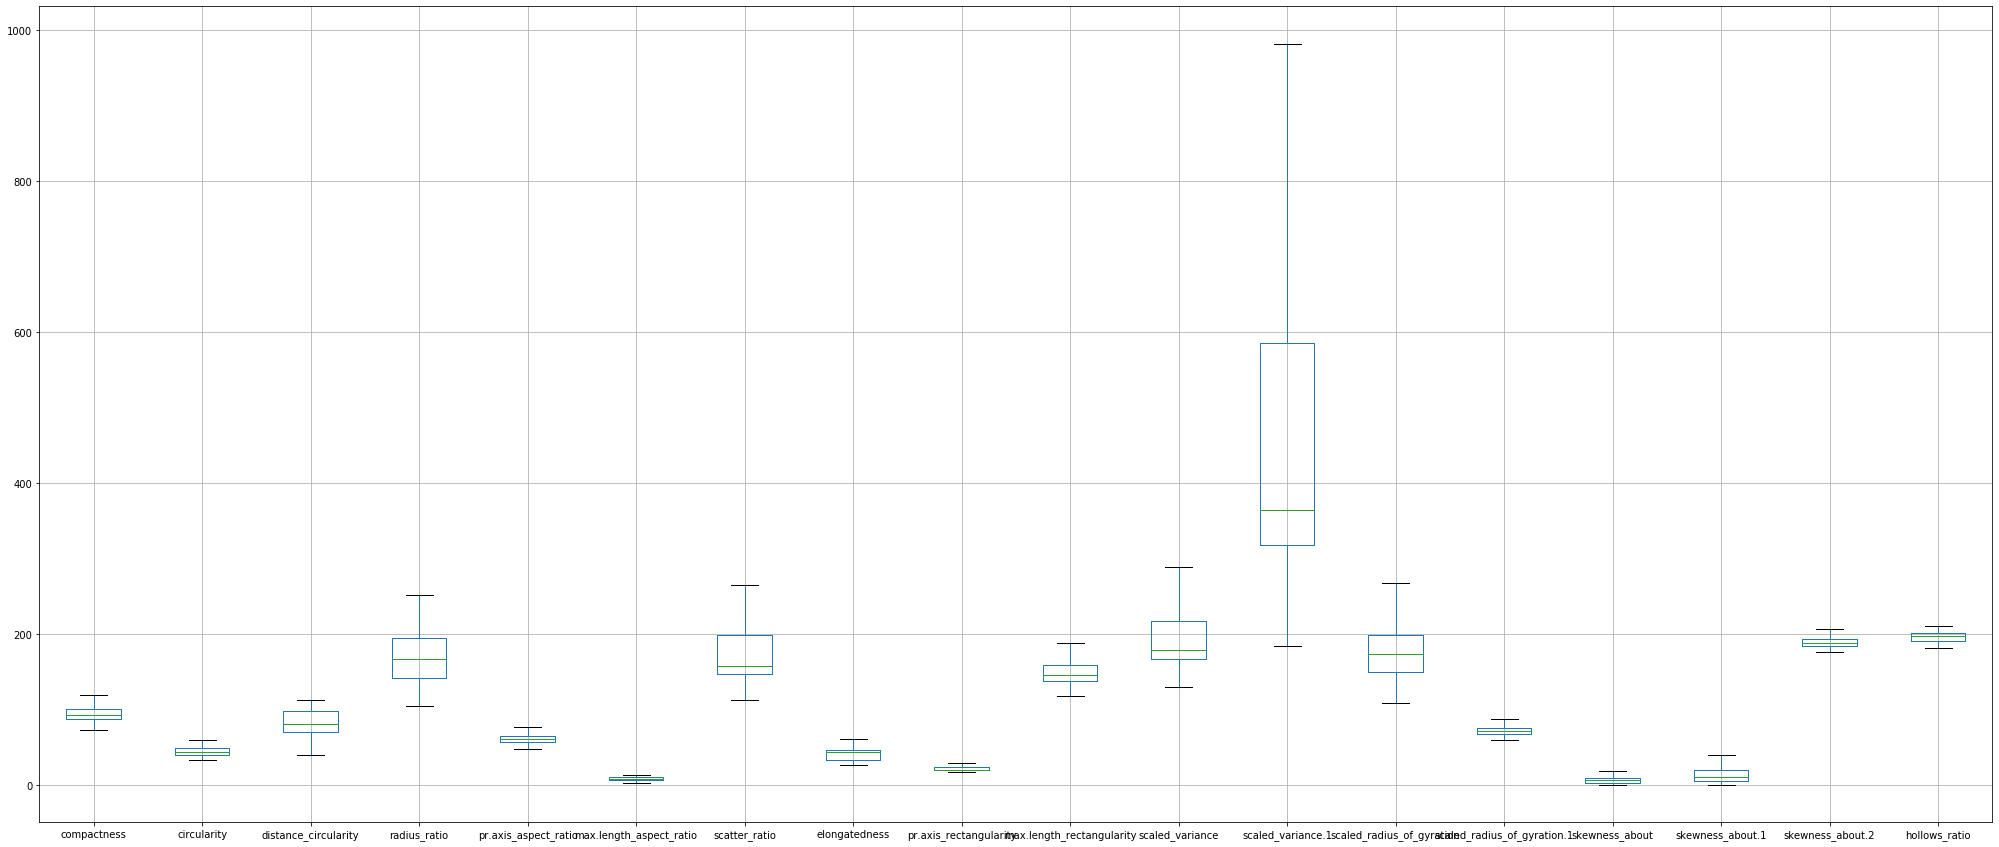

In [21]:
df.boxplot(figsize=(35,15))

    There are no outliers after handling them.
   

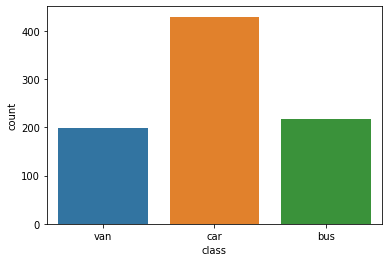

In [22]:
# Univariate analysis

sns.countplot(df['class'])

In [23]:
# Encoding the dependent attribute (class)
from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()
df['class']=labelencoder_X.fit_transform(df['class'])

In [24]:
# Multivariate analysis

#correlation Matrix
cor =df.corr()
cor

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
compactness,1.000000,0.684887,0.789928,0.721925,0.192864,0.499928,0.812620,-0.788750,0.813694,0.676143,0.769871,0.804495,0.585243,-0.246681,0.191425,0.156613,0.298537,0.365552,-0.033796
circularity,0.684887,1.000000,0.792320,0.638280,0.203253,0.560470,0.847938,-0.821472,0.843400,0.961318,0.802768,0.823832,0.925816,0.068745,0.133002,-0.004763,-0.104426,0.046351,-0.158910
distance_circularity,0.789928,0.792320,1.000000,0.794222,0.244332,0.666809,0.905076,-0.911307,0.893025,0.774527,0.869584,0.882358,0.705771,-0.229353,0.097625,0.266579,0.146098,0.332732,-0.064467
radius_ratio,0.721925,0.638280,0.794222,1.000000,0.650554,0.463958,0.769941,-0.825392,0.744139,0.579468,0.786183,0.755857,0.550774,-0.390459,0.030187,0.180299,0.405849,0.491758,-0.213948
pr.axis_aspect_ratio,0.192864,0.203253,0.244332,0.650554,1.000000,0.150295,0.194195,-0.298144,0.163047,0.147592,0.207101,0.193112,0.148591,-0.321070,-0.062233,-0.021101,0.400882,0.415734,-0.209298
max.length_aspect_ratio,0.499928,0.560470,0.666809,0.463958,0.150295,1.000000,0.490759,-0.504181,0.487931,0.642713,0.401391,0.470315,0.397397,-0.335444,0.079283,0.140808,0.083794,0.413174,0.352958
scatter_ratio,0.812620,0.847938,0.905076,0.769941,0.194195,0.490759,1.000000,-0.971601,0.989751,0.809083,0.960883,0.974217,0.799875,0.011314,0.063991,0.214243,0.005628,0.118817,-0.288895
elongatedness,-0.788750,-0.821472,-0.911307,-0.825392,-0.298144,-0.504181,-0.971601,1.000000,-0.948996,-0.775854,-0.947644,-0.946238,-0.766314,0.078391,-0.046206,-0.185713,-0.115126,-0.216905,0.339344
pr.axis_rectangularity,0.813694,0.843400,0.893025,0.744139,0.163047,0.487931,0.989751,-0.948996,1.000000,0.810934,0.947329,0.967075,0.796690,0.027545,0.073641,0.215889,-0.018649,0.099286,-0.258481
max.length_rectangularity,0.676143,0.961318,0.774527,0.579468,0.147592,0.642713,0.809083,-0.775854,0.810934,1.000000,0.750222,0.787486,0.866450,0.053856,0.128030,0.007902,-0.103948,0.076770,-0.032399


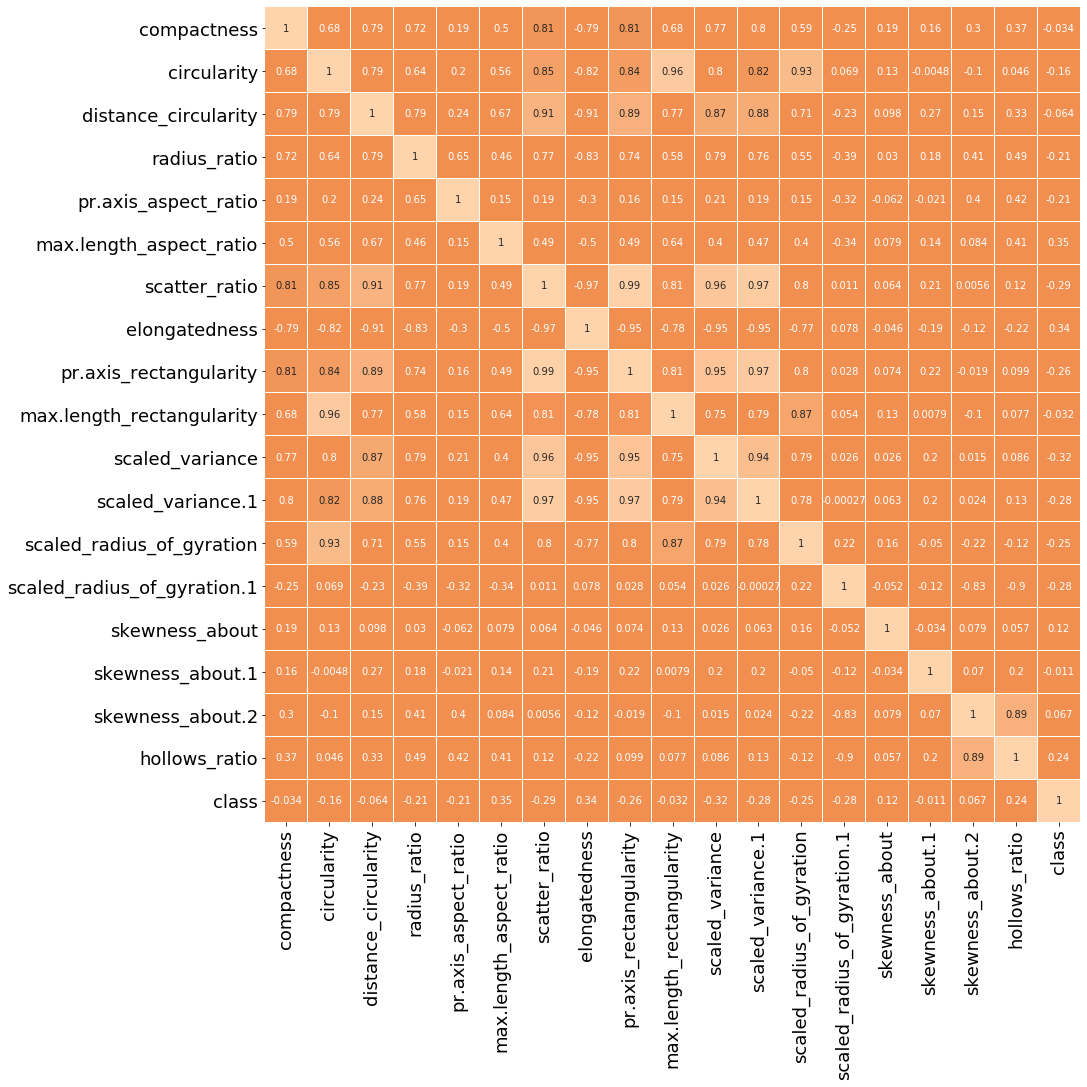

In [25]:
# Heat map
fig,ax=plt.subplots(figsize=(18,15))
sns.heatmap(cor,vmin=0.8, annot=True,linewidths=0.01,center=0,linecolor="white",cbar=False,square=True)
ax.tick_params(labelsize=18)

* Compactness is highly correlated in a positive way with scatter_ratio,
* compactness is highly correlated in a negative way with elongatedness

In [26]:
# Pair plot

#sns.pairplot(df,hue='class')

* along the diagonal,there are ponentially good predictors of the dependant variable
* Few scatter plots show heavy correlation amongst attributes
* radius_ratio has positive linear relationship with pr.axis_aspect_ratio, scatter_ratio etc
* distance_circularity has positive linear relationship with radius_ratio, scatter_ratio etc
* compactness has positive linear relationship with circularity, distance_circularity etc
* circularity has positive linear relationship with distance_circularity, scatter_ratio etc

In [27]:
X = df.drop('class', 1)
y = df['class']

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Applying Dimensionality Reduction using PCA

In [29]:
# PCA performs best with a normalized feature set.\
# standard scalar normalization to normalize our feature set.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
# Applying PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [31]:
# variance caused by each of the components.
explained_variance = pca.explained_variance_ratio_
explained_variance

array([5.40764459e-01, 1.84189249e-01, 6.86136185e-02, 6.11913462e-02,
       5.00894888e-02, 3.54970402e-02, 1.76346346e-02, 1.34701789e-02,
       7.62063778e-03, 4.55367687e-03, 4.36160675e-03, 3.64311021e-03,
       2.25245275e-03, 1.86308878e-03, 1.60484815e-03, 1.30576957e-03,
       1.12098688e-03, 2.23807287e-04])

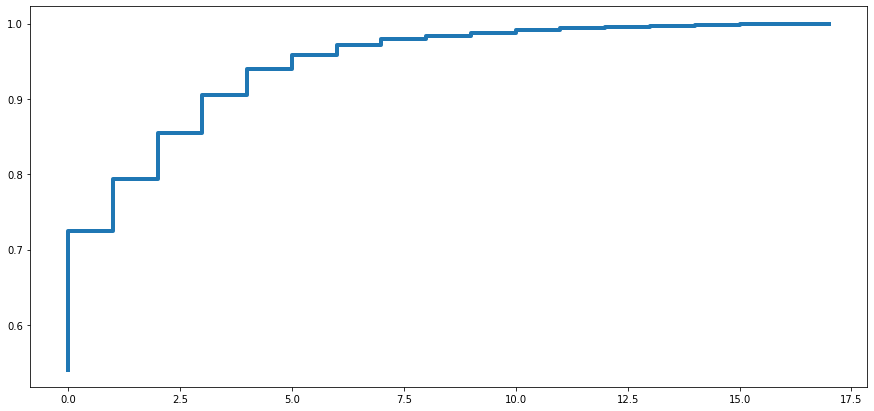

In [32]:
pca = PCA().fit(X_train)

cummulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize= (15,7))
plt.step(x = list(range(18)), y=cummulative_variance, linewidth = 4)
plt.show()

* We can eliminate last 8 principal components because around 98% of data is covered by the first 9 components.

In [33]:
# Reducing from 17 to 9 principal components and printing eigen vectors
X_s = X.apply(zscore)

pca = PCA(n_components=9)
pca = pca.fit(X_train)
pca.fit(X_s)
print(pca.components_)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

[[ 2.72611695e-01  2.87303723e-01  3.02605167e-01  2.69769123e-01
   9.78395012e-02  1.95590521e-01  3.10521654e-01 -3.09125502e-01
   3.07270232e-01  2.78249475e-01  2.99711322e-01  3.04612437e-01
   2.63159264e-01 -4.23405358e-02  3.52068571e-02  5.94742629e-02
   3.82843177e-02  8.51021487e-02]
 [-8.64759863e-02  1.32179057e-01 -4.56044958e-02 -1.97929213e-01
  -2.58454182e-01 -1.07330793e-01  7.57695386e-02 -1.36447192e-02
   8.80887349e-02  1.22797386e-01  7.76186915e-02  6.79533792e-02
   2.11108636e-01  5.03751323e-01 -1.08266229e-02 -8.90087870e-02
  -5.01963781e-01 -5.07669556e-01]
 [-3.76505473e-02 -2.01096068e-01  6.45315561e-02  5.88435248e-02
  -5.81149343e-02 -1.54075338e-01  1.09517644e-01 -9.14242775e-02
   1.05799801e-01 -2.15361807e-01  1.45037104e-01  1.05682471e-01
  -2.02214662e-01  7.64309409e-02 -5.54076251e-01  6.73595762e-01
  -6.17703772e-02 -4.45895161e-02]
 [ 1.37041838e-01 -4.16424413e-02  1.09075479e-01 -2.50557437e-01
  -6.05915883e-01  2.69523104e-01  5.

In [34]:
print(X_train.shape[1])
print(X_train_pca.shape[1])

18
9


In [35]:
# Defining a function to call the scores later on
def fit_print(model, X_train, X_test, y_train, y_test):
    from sklearn.model_selection import cross_val_score
    model.fit(X_train, y_train)   # fit the model using the train data

    pred_test = model.predict(X_test)     # model predictions on the test data
    accuracy = round(model.score(X_test, y_test), 3)
    
    results = [accuracy]
    return results

### SVM classification without using dimensionality reduction

In [36]:
# Classification model using all the attributes in the data set

svm = SVC(gamma= 'auto')

results = fit_print(svm, X_train, X_test, y_train, y_test)
results

[0.969]

    Number of dimensions used in the above classification is 18.

### SVM classification with dimensionality reduction

We already have X_train_pca and X_test_pca from dimnesionality Reduction process

In [37]:
svm = SVC(C = 10, gamma = 'scale', kernel = 'rbf')

results_pca = fit_print(svm, X_train_pca, X_test_pca, y_train, y_test)
results_pca

[0.894]

In [38]:
print(results, results_pca)

[0.969] [0.894]


### Conclusion

#### Performance of SVC in the above scenarios i:e with (9 PC's) and without( 18 PC's) dimensionality reductions is similar, this indicates that we were able to reduce attribute space by half.